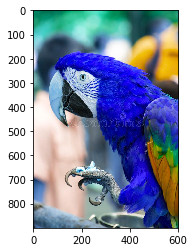

In [7]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('per.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 3)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('pero.jpg', quant)
plt.imshow(image)

cv2.imread('per.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

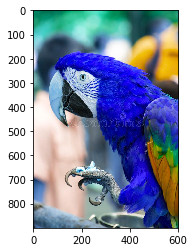

In [4]:
plt.imshow(image)

In [ ]:
!pip install opencv-python

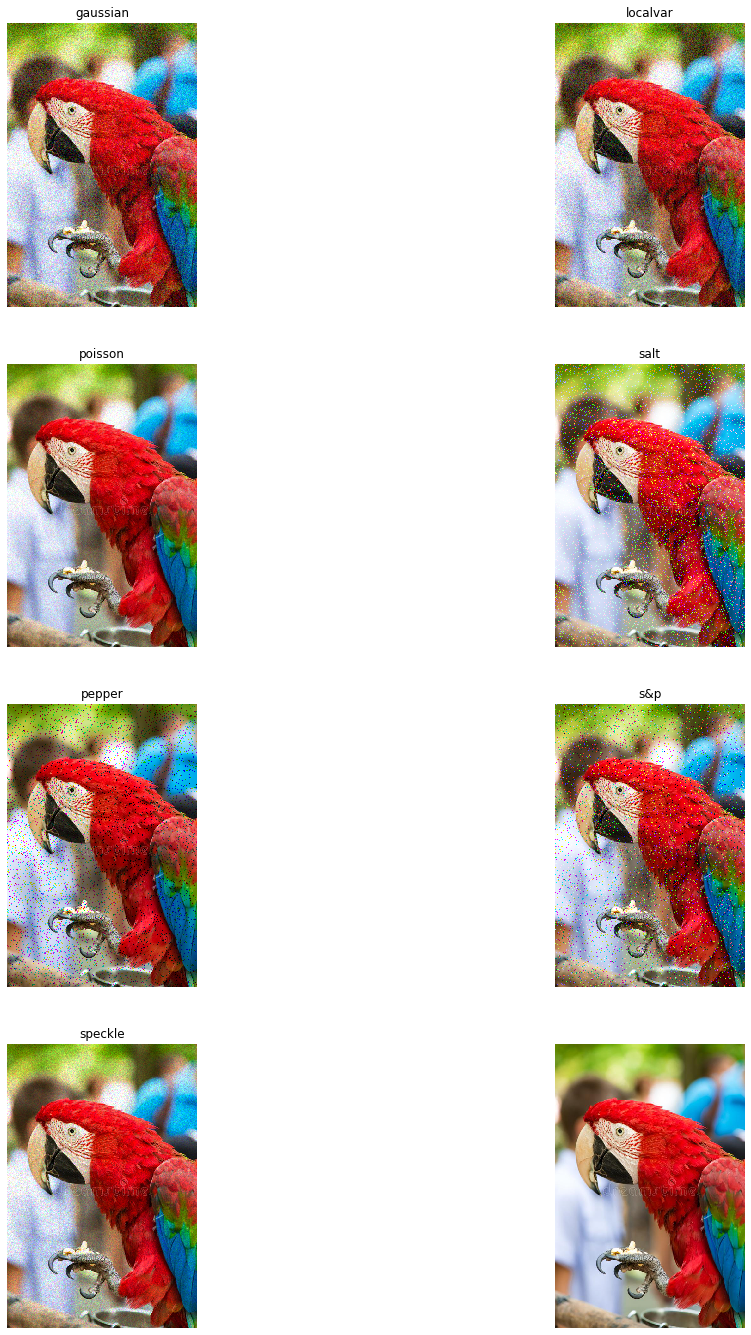

In [69]:
import skimage.io

img_path="per.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()


<h1>Denoising</h1>
<h2> 1/ Bilateral Filter</h2>

(<matplotlib.axes._subplots.AxesSubplot at 0x27b05366488>,
 <matplotlib.image.AxesImage at 0x27b06042908>)

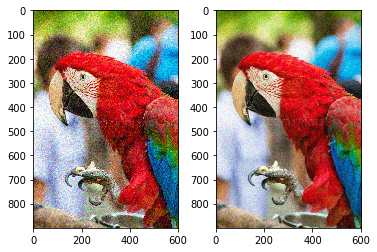

In [79]:
from c import denoise_bilateral
import skimage.io
import matplotlib.pyplot as plt
img_path="per.jpg"
img = skimage.io.imread(img_path)/255.0

# Add noise to the image
gimg = skimage.util.random_noise(img, mode="gaussian")
plt.subplot(1, 2, 1),plt.imshow(gimg)

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(gimg, multichannel=True)
plt.subplot(1, 2, 2), plt.imshow(denoised_image)





<h2> 2/ Using total variation </h2>

(<matplotlib.axes._subplots.AxesSubplot at 0x27b05c02f08>,
 <matplotlib.image.AxesImage at 0x27b0611cbc8>)

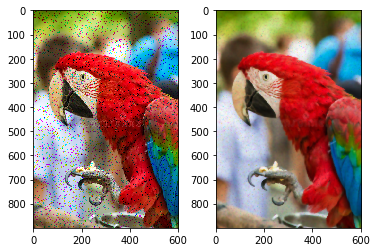

In [82]:
from skimage.restoration import denoise_tv_chambolle
import skimage.io
import matplotlib.pyplot as plt
img_path="per.jpg"
img = skimage.io.imread(img_path)/255.0

# Add noise to the image
gimg = skimage.util.random_noise(img, mode="pepper")
plt.subplot(1, 2, 1),plt.imshow(gimg)
# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(gimg ,weight=0.3,multichannel=True)
plt.subplot(1, 2, 2), plt.imshow(denoised_image)

<h2> 3/Wavelet denoising </h2>

(<matplotlib.axes._subplots.AxesSubplot at 0x27b06162748>,
 <matplotlib.image.AxesImage at 0x27b0c12b3c8>)

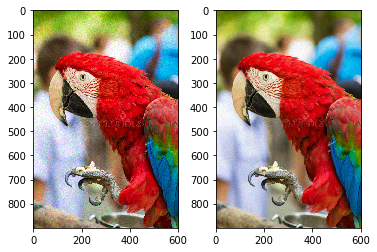

In [88]:
from skimage.restoration import denoise_wavelet
import skimage.io
import matplotlib.pyplot as plt
img_path="per.jpg"
img = skimage.io.imread(img_path)/255.0
# Add noise to the image
gimg = skimage.util.random_noise(img, mode="poisson")
plt.subplot(1, 2, 1),plt.imshow(gimg)
# Apply denoise_wavelet filter denoising
denoised_image = denoise_wavelet(gimg, sigma=0.1)
plt.subplot(1, 2, 2), plt.imshow(denoised_image)

<h2> 4/Non-local means denoising </h2>